In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

print("=== DIABETES DATA EXPLORATION ===")

=== DIABETES DATA EXPLORATION ===


In [3]:
df = pd.read_csv('../data/raw/diabetes.csv')
print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")


Dataset loaded successfully!
Shape: (768, 9)


In [4]:

print("=== DATASET OVERVIEW ===")
print("\nFirst 5 rows:")
display(df.head())

print("\nData Types:")
print(df.dtypes)

print("\nBasic Statistics:")
display(df.describe())

=== DATASET OVERVIEW ===

First 5 rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Data Types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Basic Statistics:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
print("=== MISSING VALUES ANALYSIS ===")
print("Explicit missing values:")
print(df.isnull().sum())

=== MISSING VALUES ANALYSIS ===
Explicit missing values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [6]:
print("=== BIOLOGICAL IMPOSSIBILITIES ===")
biological_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

missing_report = {}
print("Zero values in biological features (biologically impossible):")
for feature in biological_features:
    zero_count = (df[feature] == 0).sum()
    percentage = (zero_count / len(df)) * 100
    missing_report[feature] = {'zero_count': zero_count, 'percentage': percentage}
    print(f"{feature}: {zero_count} zeros ({percentage:.2f}%)")


=== BIOLOGICAL IMPOSSIBILITIES ===
Zero values in biological features (biologically impossible):
Glucose: 5 zeros (0.65%)
BloodPressure: 35 zeros (4.56%)
SkinThickness: 227 zeros (29.56%)
Insulin: 374 zeros (48.70%)
BMI: 11 zeros (1.43%)


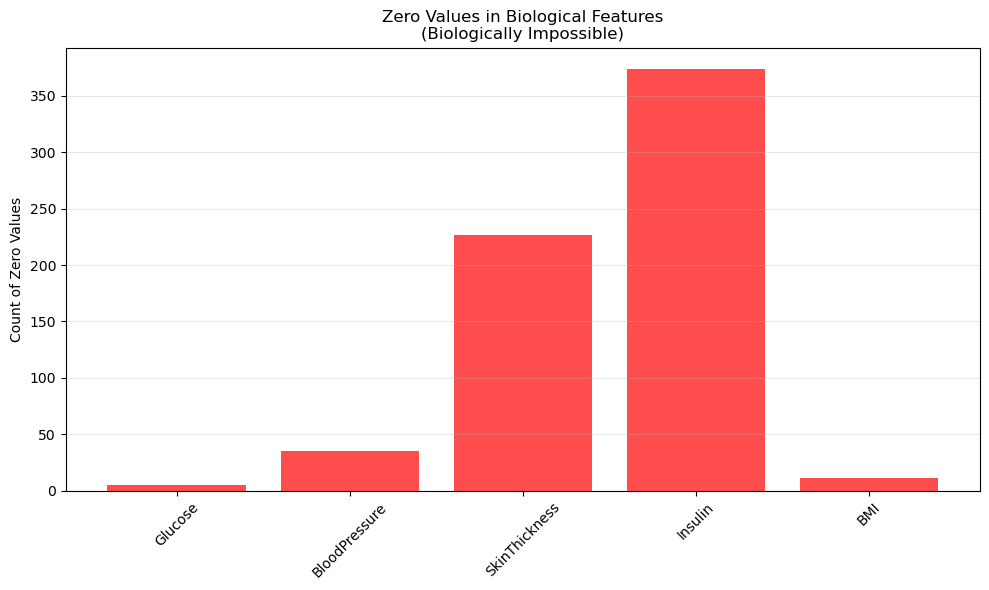

In [7]:
plt.figure(figsize=(10, 6))
zero_counts = [stats['zero_count'] for stats in missing_report.values()]
features = list(missing_report.keys())
plt.bar(features, zero_counts, color='red', alpha=0.7)
plt.title('Zero Values in Biological Features\n(Biologically Impossible)')
plt.xticks(rotation=45)
plt.ylabel('Count of Zero Values')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

=== TARGET VARIABLE ANALYSIS ===


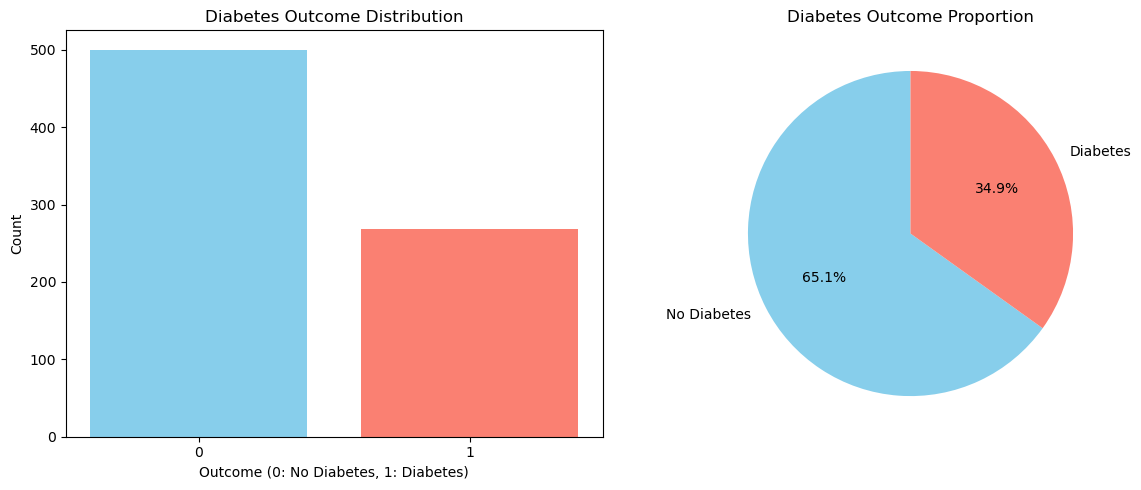

Class distribution:
Outcome
0    500
1    268
Name: count, dtype: int64
Imbalance ratio: 1.87:1


In [8]:
print("=== TARGET VARIABLE ANALYSIS ===")
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
outcome_counts = df['Outcome'].value_counts()
plt.bar(outcome_counts.index, outcome_counts.values, color=['skyblue', 'salmon'])
plt.title('Diabetes Outcome Distribution')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Count')
plt.xticks([0, 1])

plt.subplot(1, 2, 2)
plt.pie(outcome_counts.values, labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%', 
        colors=['skyblue', 'salmon'], startangle=90)
plt.title('Diabetes Outcome Proportion')

plt.tight_layout()
plt.show()

print("Class distribution:")
print(outcome_counts)
imbalance_ratio = outcome_counts[0] / outcome_counts[1]
print(f"Imbalance ratio: {imbalance_ratio:.2f}:1")

=== FEATURE DISTRIBUTIONS ===


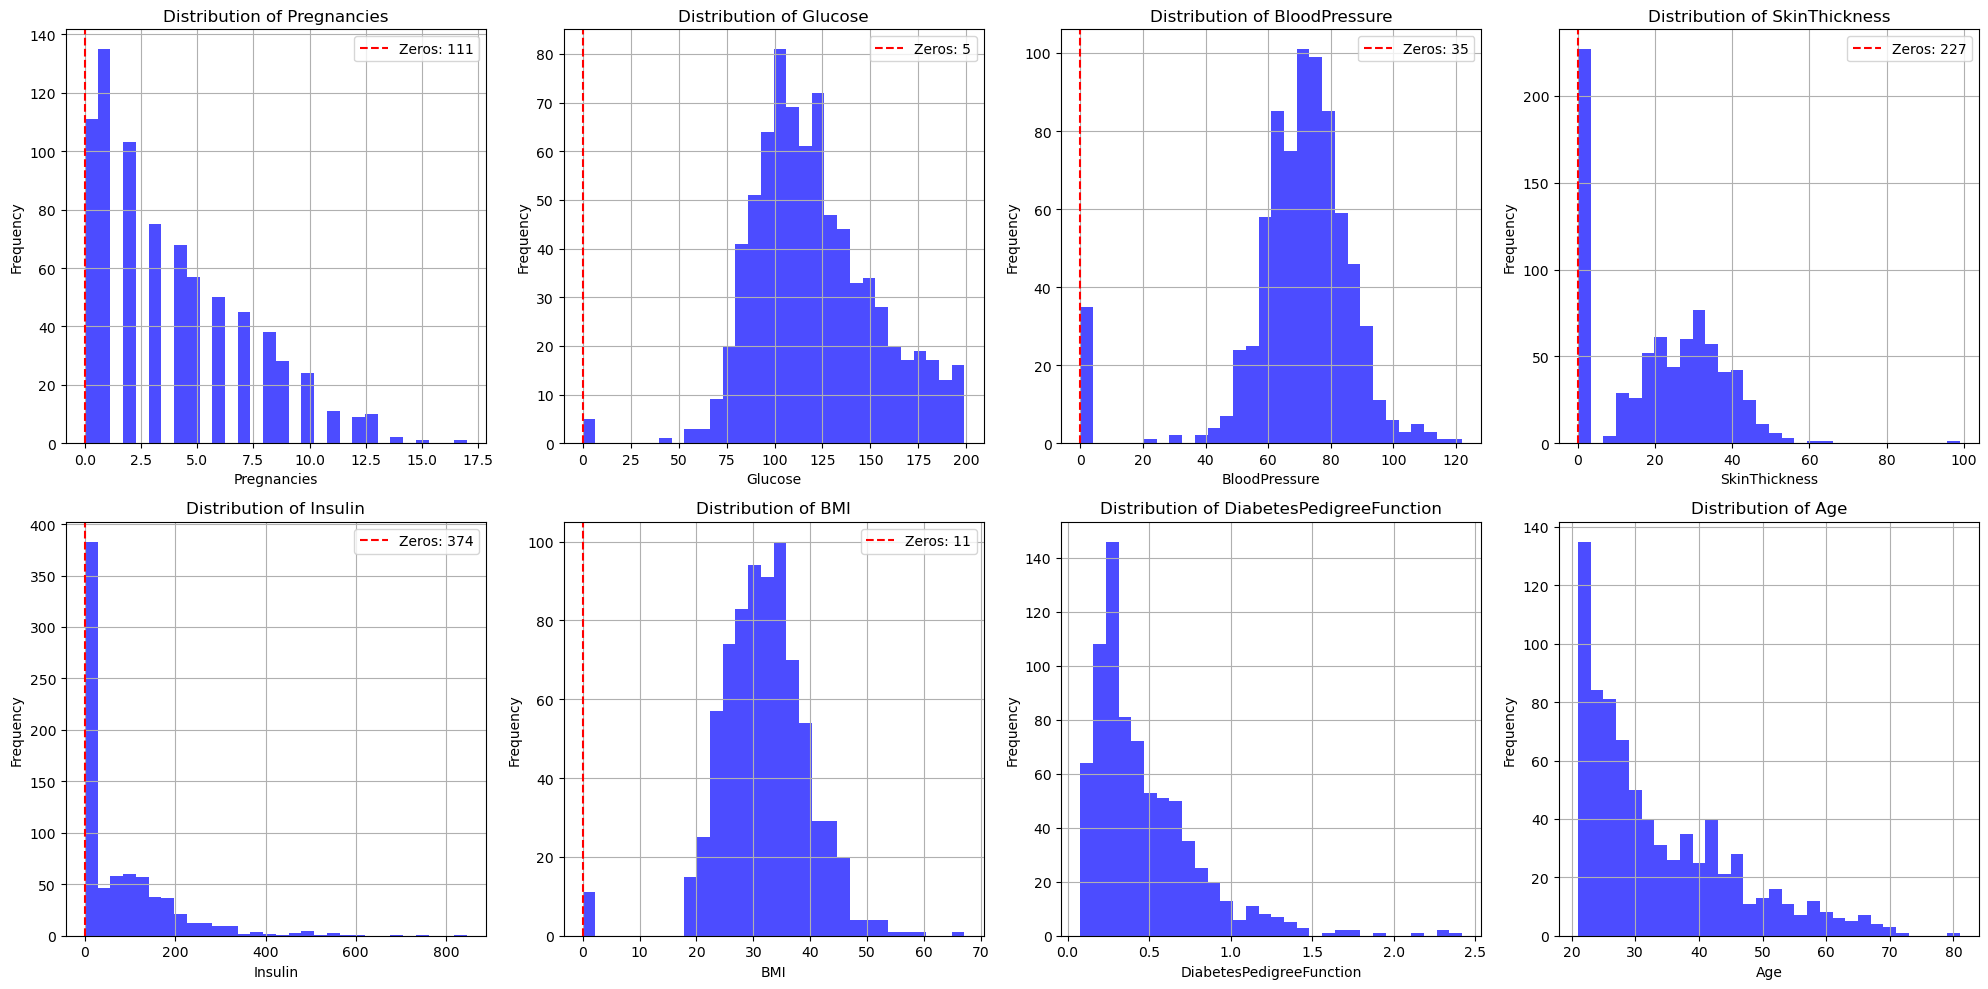

In [9]:
print("=== FEATURE DISTRIBUTIONS ===")
numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                     'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, feature in enumerate(numerical_features):
    df[feature].hist(bins=30, ax=axes[i], alpha=0.7, color='blue')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    
    # Mark zero values
    zero_count = (df[feature] == 0).sum()
    if zero_count > 0:
        axes[i].axvline(x=0, color='red', linestyle='--', 
                       label=f'Zeros: {zero_count}')
        axes[i].legend()

plt.tight_layout()
plt.show()


=== CORRELATION ANALYSIS ===


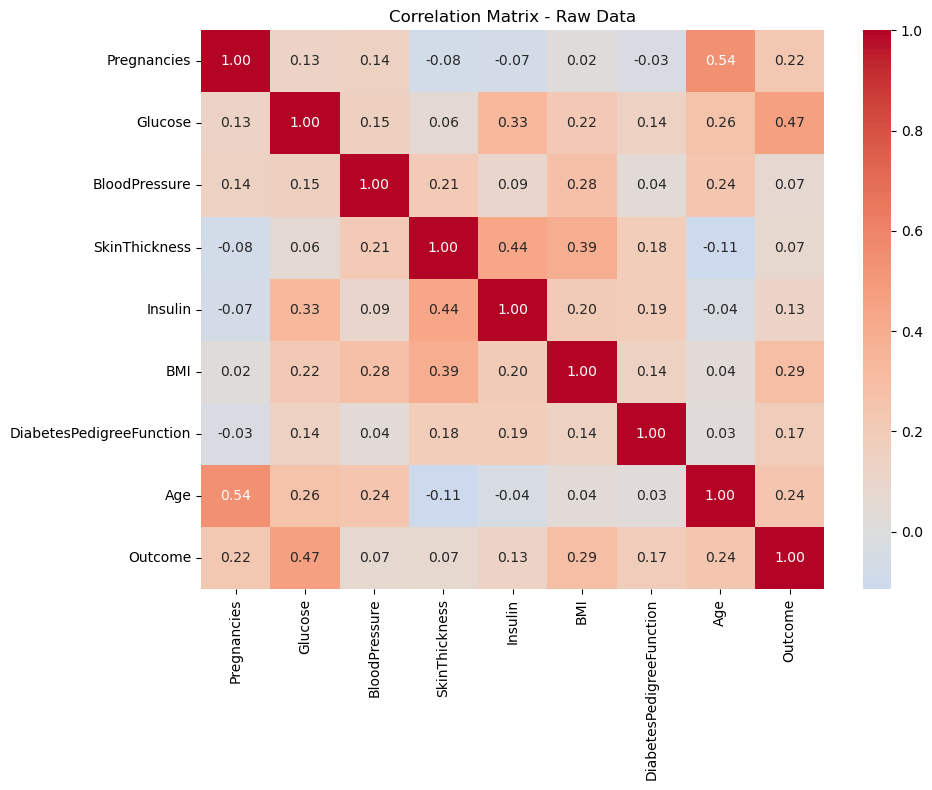

Features most correlated with Outcome:
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Name: Outcome, dtype: float64


In [10]:
print("=== CORRELATION ANALYSIS ===")
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix - Raw Data')
plt.tight_layout()
plt.show()

print("Features most correlated with Outcome:")
outcome_corr = correlation_matrix['Outcome'].abs().sort_values(ascending=False)
print(outcome_corr[1:6])  # Skip Outcome itself


In [11]:
print("=== OUTLIER DETECTION ===")
def detect_outliers_iqr(df, features):
    outlier_report = {}
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
        outlier_report[feature] = {
            'count': len(outliers),
            'percentage': (len(outliers) / len(df)) * 100,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }
    return outlier_report

outlier_report = detect_outliers_iqr(df, numerical_features)
print("Outlier Report (IQR method):")
for feature, stats in outlier_report.items():
    print(f"{feature}: {stats['count']} outliers ({stats['percentage']:.2f}%)")


=== OUTLIER DETECTION ===
Outlier Report (IQR method):
Pregnancies: 4 outliers (0.52%)
Glucose: 5 outliers (0.65%)
BloodPressure: 45 outliers (5.86%)
SkinThickness: 1 outliers (0.13%)
Insulin: 34 outliers (4.43%)
BMI: 19 outliers (2.47%)
DiabetesPedigreeFunction: 29 outliers (3.78%)
Age: 9 outliers (1.17%)


In [12]:

# Cell 11: Data quality summary
print("=== DATA QUALITY SUMMARY ===")
print("📊 EXPLORATION SUMMARY")
print("=" * 50)
print(f"Dataset: {df.shape[0]} samples, {df.shape[1]} features")
print(f"Biological impossibilities: {sum([stats['zero_count'] for stats in missing_report.values()])}")
print(f"Class imbalance: {imbalance_ratio:.2f}:1")

print("\n🔍 KEY FINDINGS:")
print("1. Significant zero values in biological features (especially Insulin: 48.7%)")
print("2. Moderate class imbalance (1.87:1)")
print("3. No explicit missing values, but zeros represent missing measurements")
print("4. Several features show outliers using IQR method")

print("\n🚨 DATA QUALITY ISSUES IDENTIFIED:")
issues = [
    "Zero values in Glucose, BloodPressure, SkinThickness, Insulin, BMI",
    "Missing values disguised as zeros",
    "Class imbalance in target variable",
    "Outliers in several features"
]

for i, issue in enumerate(issues, 1):
    print(f"  {i}. {issue}")

print("\n✅ READY FOR DATA CLEANING PHASE")
print("Next: Run 02_data_cleaning.ipynb")

=== DATA QUALITY SUMMARY ===
📊 EXPLORATION SUMMARY
Dataset: 768 samples, 9 features
Biological impossibilities: 652
Class imbalance: 1.87:1

🔍 KEY FINDINGS:
1. Significant zero values in biological features (especially Insulin: 48.7%)
2. Moderate class imbalance (1.87:1)
3. No explicit missing values, but zeros represent missing measurements
4. Several features show outliers using IQR method

🚨 DATA QUALITY ISSUES IDENTIFIED:
  1. Zero values in Glucose, BloodPressure, SkinThickness, Insulin, BMI
  2. Missing values disguised as zeros
  3. Class imbalance in target variable
  4. Outliers in several features

✅ READY FOR DATA CLEANING PHASE
Next: Run 02_data_cleaning.ipynb
